**Implemeting ANN digit recognizer from scratch**

We will be using the popular MNSIT dataset here. 

Link: https://www.kaggle.com/sylvia23/mnist-data-for-digit-recognation

In [1]:
#importing necessary packages
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing training dataset
X_train = idx2numpy.convert_from_file('C:/Users/Vishal/Downloads/7666_10873_bundle_archive/train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('C:/Users/Vishal/Downloads/7666_10873_bundle_archive/train-labels.idx1-ubyte')

#Dimensions
print("X-train :", X_train.shape, "Y-train: ",y_train.shape)

X-train : (60000, 28, 28) Y-train:  (60000,)


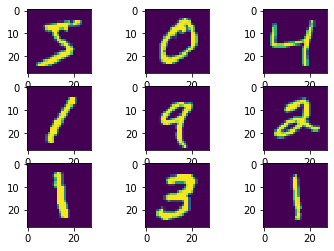

In [3]:
#Displaying few images
#Each image is 28 * 28 pixel image
plt.figure(figsize=(6,4))

for i in range(9):
  plt.subplot(3,3,i + 1)
  plt.imshow(X_train[i])

plt.show()

In [4]:
#Reshaping
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = y_train.reshape(len(y_train), 1).T
print("X-train :", X_train.shape, "Y-train: ",y_train.shape)

X-train : (60000, 784) Y-train:  (1, 60000)


In [5]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print(X_train.shape)

(60000, 784)


In [6]:
#Transposing matrix X
X_train_new = X_train.reshape(X_train.shape[0], -1).T

The output layer will be 10 units. The unit with the highest value is our predicted digit. 

Now we need to reshape y accordingly

In [7]:
#Reshaping Y_train
Y_train = np.zeros((10,y_train.shape[1]))
for i in range(y_train.shape[1]):
    Y_train[y_train[0,i],i]=1 #The respective position in the column is marked 1

print(Y_train.shape)    

(10, 60000)


Alright now lets build our neural network

In [8]:
def sigmoid(X):
  res = 1 / (1 + np.exp(-X))
  return res

In [9]:
def initialize_parameters(input_layer, hidden_layer_1, hidden_layer_2, hidden_layer_3, output_layer):
  
  #Weights and biases between input layer and hidden layer 1 
  W1 = np.random.randn(hidden_layer_1, input_layer) * 0.01
  b1 = np.zeros((hidden_layer_1, 1))

  #Weights and biases between hidden layer 1 and hidden layer 2 
  W2 = np.random.randn(hidden_layer_2, hidden_layer_1) * 0.01
  b2 = np.zeros((hidden_layer_2, 1))
  
  #Weights and biases between hidden layer 1 and hidden layer 2 
  W3 = np.random.randn(hidden_layer_3, hidden_layer_2) * 0.01
  b3 = np.zeros((hidden_layer_3, 1))

  #Weights and biases between hidden layer 3 and output layer 
  W4 = np.random.randn(output_layer, hidden_layer_3) * 0.01
  b4 = np.zeros((output_layer, 1))

  Weights = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2, "W3" : W3, "b3" : b3, "W4" : W4, "b4" : b4}
  return Weights

In [10]:
def Forward_prop(X, Weights):

  #Extracting weights and biases
  W1 = Weights["W1"]
  W2 = Weights["W2"]
  W3 = Weights["W3"]
  W4 = Weights["W4"]

  b1 = Weights["b1"]
  b2 = Weights["b2"]
  b3 = Weights["b3"]
  b4 = Weights["b4"]

  #Forward propagation - We will be using tanh as activation for hidden layer 
  #and sigmoid for output_layer
  Z1 = np.matmul(W1, X) + b1
  A1 = np.tanh(Z1)

  Z2 = np.matmul(W2, A1) + b2
  A2 = np.tanh(Z2)

  Z3 = np.matmul(W3, A2) + b3
  A3 = np.tanh(Z3)
  
  Z4 = np.matmul(W4, A3) + b4
  A4 = sigmoid(Z4) #Our Y_hat or predicted value

  Units = {"Z1" : Z1, "A1" : A1, "Z2" : Z2, "A2" : A2, "Z3" : Z3, "A3" : A3, "Z4" : Z4, "A4" : A4}
  return Units

In [11]:
def cost_compute(Units, y, m):

  #Extracting Y_hat from Units
  A4 = Units["A4"]

  #The cost function is the same as the one we used for logistic regression
  J = (np.sum((-y * np.log(A4)) - ((1 - y) * (np.log(1 - A4)))) / m)

  return J

In [12]:
def Back_prop(Weights, Units, X, Y):

  #Extracting Weights
  W1 = Weights["W1"]
  W2 = Weights["W2"]
  W3 = Weights["W3"]
  W4 = Weights["W4"]

  #Extracting units
  A1 = Units["A1"]
  A2 = Units["A2"]
  A3 = Units["A3"]
  A4 = Units["A4"]

  #Back propagation
  dz4 = A4 - Y
  dw4 = (1/m) * np.matmul(dz4, A3.T)
  db4 = (1/m) * np.sum(dz4, axis = 1, keepdims = True)

  dz3 = np.multiply(np.matmul(W4.T, dz4), 1 - np.power(A3,2)) # derivative of tanh(Z) = 1-A^2
  dw3 = (1/m) * np.matmul(dz3, A2.T)
  db3 = (1/m) * np.sum(dz3, axis = 1, keepdims = True)
  
  dz2 = np.multiply(np.matmul(W3.T, dz3), 1 - np.power(A2,2))
  dw2 = (1/m) * np.matmul(dz2, A1.T)
  db2 = (1/m) * np.sum(dz2, axis = 1, keepdims = True)

  dz1 = np.multiply(np.matmul(W2.T, dz2), 1 - np.power(A1,2))
  dw1 = (1/m) * np.matmul(dz1, X.T)
  db1 = (1/m) * np.sum(dz1, axis = 1, keepdims = True)

  Grads = {"dw1" : dw1, "db1" : db1, "dw2" : dw2, "db2" : db2, "dw3" : dw3, "db3" : db3, "dw4" : dw4, "db4" : db4}
  return Grads

In [13]:
def Update_Weights(Weights, Grads, alpha):
  
  #Extracting weights and biases
  W1 = Weights["W1"]
  W2 = Weights["W2"]
  W3 = Weights["W3"]
  W4 = Weights["W4"]

  b1 = Weights["b1"]
  b2 = Weights["b2"]
  b3 = Weights["b3"]
  b4 = Weights["b4"]

  #Extracting grads
  dw1 = Grads["dw1"]
  dw2 = Grads["dw2"]
  dw3 = Grads["dw3"]
  dw4 = Grads["dw4"]

  db1 = Grads["db1"]
  db2 = Grads["db2"]
  db3 = Grads["db3"]
  db4 = Grads["db4"]

  #Updating weights and biases
  W1 = W1 - alpha * dw1
  W2 = W2 - alpha * dw2
  W3 = W3 - alpha * dw3
  W4 = W4 - alpha * dw4

  b1 = b1 - alpha * db1
  b2 = b2 - alpha * db2
  b3 = b3 - alpha * db3
  b4 = b4 - alpha * db4

  Weights = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2, "W3" : W3, "b3" : b3, "W4" : W4, "b4" : b4}
  return Weights

Cost after Iter : 0 Cost : 6.931531114145497
Cost after Iter : 2500 Cost : 3.248117655935567
Cost after Iter : 5000 Cost : 3.2398071759443283
Cost after Iter : 7500 Cost : 2.608187689589327
Cost after Iter : 10000 Cost : 1.7017058105747278
Cost after Iter : 12500 Cost : 1.2766358601826253
Cost after Iter : 15000 Cost : 0.8816064185426775
Cost after Iter : 17500 Cost : 0.6894924706576251
Cost after Iter : 20000 Cost : 0.5611616639789043
Cost after Iter : 22500 Cost : 0.4517006747821626
Cost after Iter : 25000 Cost : 0.37109216062039924
Cost after Iter : 27500 Cost : 0.31188163180591477
Cost after Iter : 30000 Cost : 0.2660865801140939
Cost after Iter : 32500 Cost : 0.22913227312564416
Cost after Iter : 35000 Cost : 0.19849845186933046
Cost after Iter : 37500 Cost : 0.17245856978306584
Cost after Iter : 40000 Cost : 0.15005020695465854
Cost after Iter : 42500 Cost : 0.13071139307740093
Cost after Iter : 45000 Cost : 0.11397101933686839
Cost after Iter : 47500 Cost : 0.09952009844614551


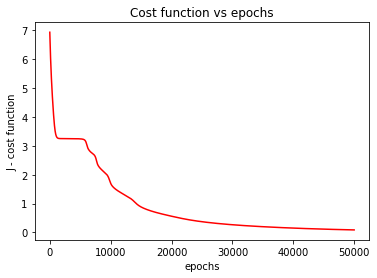

In [18]:
# ANN implementation
input_layer = X_train_new.shape[0]
hidden_layer_1 = 180
hidden_layer_2 = 120
hidden_layer_3 = 120
output_layer = Y_train.shape[0]

epochs = 50000
m = X_train_new.shape[1]
alpha = 0.005

#Dictionary containing the weights of the different layers
Weights = initialize_parameters(input_layer, hidden_layer_1, hidden_layer_2, hidden_layer_3, output_layer)

#Storing cost history for plotting purposes
J_hist = []

#Gradient descent
for i in range(epochs):
  Units = Forward_prop(X_train_new, Weights)

  J = cost_compute(Units, Y_train, m)
  J_hist.append(J)

  Grads = Back_prop(Weights, Units, X_train_new, Y_train)  

  Weights = Update_Weights(Weights, Grads, alpha)
  if i % 2500 == 0:
    print("Cost after Iter :", i, "Cost :", J)

#Plotting cost vs epochs
plt.plot(list(range(epochs)), J_hist, color = 'red')
plt.title("Cost function vs epochs")
plt.xlabel("epochs")
plt.ylabel("J - cost function")
plt.show()

In [19]:
finalWeights = Weights

Alright now lets prepare our test set

In [20]:
#Importing training dataset
X_test = idx2numpy.convert_from_file('C:/Users/Vishal/Downloads/7666_10873_bundle_archive/t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('C:/Users/Vishal/Downloads/7666_10873_bundle_archive/t10k-labels.idx1-ubyte')

#Reshaping
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = y_test.reshape(len(y_test), 1).T

#Feature scaling
X_test = scaler.transform(X_test)

print("X-test :", X_test.shape, "Y-test: ",y_test.shape)

X-test : (10000, 784) Y-test:  (1, 10000)


In [21]:
#Transposing matrix X_test
X_test_new = X_test.reshape(X_test.shape[0], -1).T
print("X-test :", X_test_new.shape)

X-test : (784, 10000)


In [22]:
#Reshaping Y_test
Y_test = np.zeros((10,y_test.shape[1]))
for i in range(y_test.shape[1]):
    Y_test[y_test[0,i],i]=1 #The respective position in the column is marked 1

print(Y_test.shape) 

(10, 10000)


In [23]:
def predict(X, Weights):
    
  #Calling forward propagation and getting y_pred
  finalUnits = Forward_prop(X, Weights)
  y_pred = finalUnits["A4"]

  #Obtaining index (= digit) with highest value
  Y_pred = np.argmax(y_pred, axis = 0)
  Y_pred.reshape(1, Y_pred.shape[0])
    
  return Y_pred 

In [24]:
y_pred = predict(X_test_new, Weights)
y_pred = y_pred.reshape(10000, 1)
y_test = y_test.T
print(y_pred.shape, y_test.shape)
score = (np.sum(y_test == y_pred) / 10000) * 100
print("Accuracy :", score, "%")

(10000, 1) (10000, 1)
Accuracy : 96.6 %


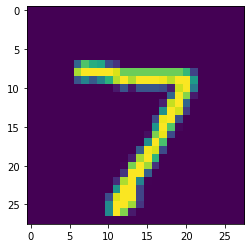

Predicted digit is : [7]
True digit is: [7]


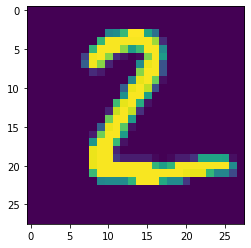

Predicted digit is : [2]
True digit is: [2]


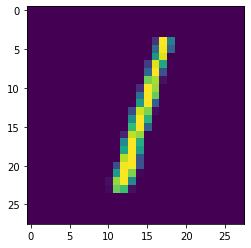

Predicted digit is : [1]
True digit is: [1]


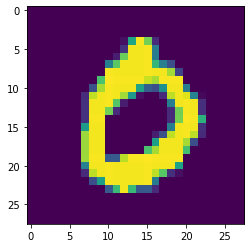

Predicted digit is : [0]
True digit is: [0]


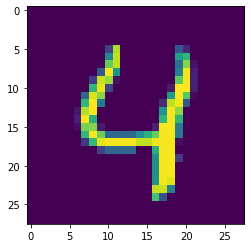

Predicted digit is : [4]
True digit is: [4]


In [25]:
#Showcasing some results
X_test = idx2numpy.convert_from_file('C:/Users/Vishal/Downloads/7666_10873_bundle_archive/t10k-images.idx3-ubyte')

for i in range(5):
    img = X_test[i].reshape((784,1)).T
    img = scaler.transform(img)
    img = img.T
    
    plt.imshow(X_test[i])
    plt.show()
    
    predicted_digit = predict(img, Weights)
    print('Predicted digit is : '+str(predicted_digit))
    print('True digit is: '+ str(np.where(Y_test[:,i] == 1)[0]))